In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image


In [33]:
img1_grayscale = cv.imread('../Images/1/Car1.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2_grayscale = cv.imread('../Images/1/Car2.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1_grayscale,None)
kp2, des2 = orb.detectAndCompute(img2_grayscale,None)

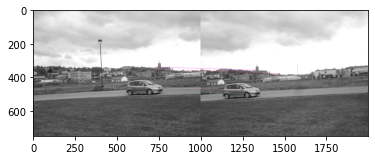

(<matplotlib.image.AxesImage at 0x24e1e868610>, None)

In [34]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw 6 matches.
point_matches = matches[0:4]
img3 = cv.drawMatches(img1_grayscale,kp1,img2_grayscale,kp2,point_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv.imwrite('matching_4points.jpg', img3) 
plt.imshow(img3),plt.show()

In [35]:
list_kp1 = []
list_kp2 = []

# For each match...
for mat in point_matches:
    

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt
    print((x1, y1))
    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

(761.4260864257812, 460.33929443359375)
(741.0, 339.0)
(691.2000122070312, 479.52001953125)
(895.1040649414062, 357.696044921875)


In [36]:
img1 = cv.imread('../Images/1/Car1.jpg') 
img2 = cv.imread('../Images/1/Car2.jpg') 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


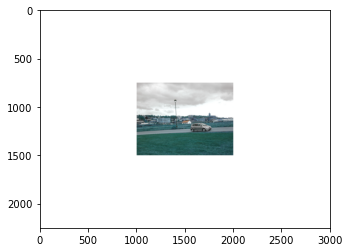

In [37]:
DUMMY = 256
stitched_result = np.full((img1.shape[0]+2*img2.shape[0]+1,img1.shape[1]+2*img1.shape[1]+1,img1.shape[2]) , fill_value=DUMMY , dtype=np.uint16)
stitched_result[img2.shape[0]:img2.shape[0]+img1.shape[0] ,img2.shape[1]:img2.shape[1]+img1.shape[1] , : ] = img1
plt.imshow(stitched_result)

In [38]:
Ax = np.array([[1,list_kp2[i][0] ,list_kp2[i][1] , list_kp2[i][0]*list_kp2[i][1] ] for i in range(4)])
x_in_first_image = np.array([list_kp1[i][0] for i in range(0,4)])
x_coefficients = np.linalg.solve(Ax,x_in_first_image)

# Ax = np.array([[1,list_kp2[i][0] ,list_kp2[i][1] , list_kp2[i][0]*list_kp2[i][1] ,int(list_kp2[i][0] ** 2) , int(list_kp2[i][1] ** 2) ] for i in range(6)])
y_in_first_image = np.array([list_kp1[i][1] for i in range(0,4)])
y_coefficients = np.linalg.solve(Ax,y_in_first_image)

In [39]:
print(Ax)

print(x_coefficients)
print(y_coefficients)

[[1.00000000e+00 3.43388245e+02 4.77757568e+02 1.64056333e+05]
 [1.00000000e+00 3.25000000e+02 3.58000000e+02 1.16350000e+05]
 [1.00000000e+00 2.73600006e+02 4.98240021e+02 1.36318473e+05]
 [1.00000000e+00 4.70016052e+02 3.78432037e+02 1.77869132e+05]]
[ 3.37235273e+02  1.22650251e+00  1.56831878e-01 -4.38284499e-04]
[ 1.94477922e+01 -1.29955149e-01  9.10534613e-01  3.07831884e-04]


In [40]:
for i in range(0,img2.shape[0]): # y
    for j in range(0,img2.shape[1]): # x
        x_stitched = int(x_coefficients[0]+(x_coefficients[1]*j)+(x_coefficients[2]*i)+(x_coefficients[3]*i*j))
        y_stitched = int(y_coefficients[0]+(y_coefficients[1]*j)+(y_coefficients[2]*i)+(y_coefficients[3]*i*j))
        x_stitched += img1.shape[1]
        y_stitched += img1.shape[0]
        
        stitched_result[y_stitched,x_stitched,:] = img2[i,j]

print("stitching done!")

stitching done!


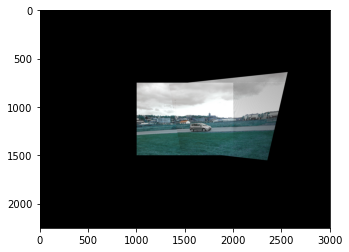

In [41]:
plt.imshow(stitched_result.astype(np.uint8))
Image.fromarray(stitched_result.astype(np.uint8)).save('stitched_result_4points.png')